<h1>Baby Yoda Gone Robo!</h1>

<p><em>Risk-averse investors can structure portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment, the hypothesis put forth by Harry Markowitz in "Portfolio Selection"(published in 1952 by the Journal of Finance).</em></p>

<h3>Simplified Investing Utilizing Efficient Frontier and Sharpe Ratio Optimizations ?</h3>

<p><strong>80% Of Americans Live Paycheck To Paycheck</strong> <br />
           2017 Survey Career Builder</p>

<p><strong>70 % Of Americans Lack Basic Financial Knowledge</strong> <br />
          2017 Journal of Human Resources</p>

<p><strong>1 in 4 Have No Retirement Savings</strong> <br />
          2019 Federal Reserve Report</p>

<p><strong>“Be The Change That You Wish To See In The World”</strong> <br />
          Mahatma Gandhi</p>

<hr />

<p><strong>Does Anyone Know What That Even Means?  Why Not Just Make it Simple For Everyone?</strong></p>

In [1]:
# initial imports
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
#from datetime import datetime, timedelta
import hvplot.pandas
import panel as pn
import plotly.express as px

import yoda_simulator as ys

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

<h2>Data Cleanup – Group Portfolios based on PyPortfolio Optimizer and Weights</h2>

<p>Group Data Subsets (Fixed Income, Equity &amp; Blended)</p>

<ul>
<li>Insights: Constructing Portfolios 
<ul><li>Generate Avg Returns</li>
<li>Generate Standard Deviations</li>
<li>Generate Sharpe Ratio’s</li>
<li>Generate  Efficient Weights</li>
<li>Generate Call Functions for  Dashboard</li></ul></li>
</ul>

<h2>Challenges</h2>

<ul>
<li>Cleaning data in proper form to be able to call function.
<ul><li>Monthly rebalancing</li>
<li>Yearly withdraw/deposit ( by the amount and by rate)</li>
<li>Call external py file with functions</li>
<li>Interact with end-user by connecting widgets to a useful tool</li>
<li>Creating User Investment Optimizer (forward and backward)</li>
<li>Synchronize the functions with panel requirements</li></ul></li>
</ul>

<h2>Generating a readable and elaborate Dashboard to reflect our overall theme of investing made simple.</h2>



# Import Data

In [2]:
# Import the portflios to Pandas DataFrames
portfolio1 = pd.read_csv('./all_data_pull/Yoda 1 - The World is Your Oyster.csv').set_index('Unnamed: 0')
portfolio2 = pd.read_csv('./all_data_pull/Yoda 2 - Play It Again Sam.csv').set_index('Unnamed: 0')
portfolio3 = pd.read_csv('./all_data_pull/Yoda 3 - Bond James Bond.csv').set_index('Unnamed: 0')
portfolio4 = pd.read_csv('./all_data_pull/Yoda 4 - Have Your Cake And Eat It Too.csv').set_index('Unnamed: 0')
portfolio5 = pd.read_csv('./all_data_pull/Yoda 5 - Show Me The Money.csv').set_index('Unnamed: 0')
display(portfolio1, portfolio4, portfolio5)

,VOOV,EZU,IWM,SMH,IBB,XLU,VOOG,SPY,QQQ,BKF,EEM,AIA
Unnamed: 0,,,,,,,,,,,,
Daily Mean Returns,0.000293,0.000125,0.000300,0.000857,0.000218,0.000359,0.000510,0.000405,0.000673,0.000237,0.000131,0.000294
Standard Deviation,0.008173,0.010617,0.010226,0.014656,0.015205,0.008761,0.009015,0.008456,0.010814,0.012705,0.011901,0.011704
Weights,0.833000,0.833000,0.833000,0.833000,0.833000,0.833000,0.833000,0.833000,0.833000,0.833000,0.833000,0.833000


,SMH,XLU,QQQ,TLT
Unnamed: 0,,,,
Mean Daily Returns,0.000857,0.000359,0.000673,0.000116
Standard Deviation,0.014656,0.008761,0.010814,0.007575
Weights,0.228760,0.200550,0.310590,0.260100


,SMH,XLU,QQQ
Unnamed: 0,,,
Mean Daily Returns,0.000857,0.000359,0.000673
Standard Deviation,0.014656,0.008761,0.010814
Weights,0.289930,0.364650,0.345420


<h1>All Optimal Portfolios</h1>

<ul>
<li>Yoda 1 - The World is Your Oyster</li>
</ul>

<hr />

<ul>
<li>Yoda 2 - Play It Again Sam</li>
</ul>

<hr />

<ul>
<li>Yoda 3 - Bond James Bond</li>
</ul>

<hr />

<ul>
<li>Yoda 4 - Have Your Cake And Eat It Too </li>
</ul>

<hr />

<ul>
<li>Yoda 5 - Show Me The Money</li>
</ul>

<hr />



<h1>User Interactive Investment Simulation Tool</h1>

In [3]:
#use interactive widgets for insert user data, which should be presented on the welcome tab, 
#and add click buton to call the functions for all portfolio.
#to make it easier

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
from ipywidgets import widgets
import yoda_simulator as ys
from IPython.display import display


#this widgets should be put in function at the end, 

slider = widgets.IntSlider(value= 5, min=5, max=30)


dropdown = widgets.Dropdown(options=['Yoda 1 - The World is Your Oyster',
                           'Yoda 2 - Play It Again Sam',
                           'Yoda 3 - Bond James Bond',
                           'Yoda 4 - Have Your Cake And Eat It Too', 
                           'Yoda 5 - Show Me The Money'])


investment = widgets.FloatText()

withdrawal_type = widgets.Dropdown(options=['fixed amount', 'fixed rate'])

withdrawal_number = widgets.FloatText()
#with withdraw_type = rate, it is like 0.05, if withdraw type = amount, should input $$$ amount.

investment_target = widgets.FloatText()

button = widgets.Button(description="Calculate!")
output = widgets.Output()

#here we are gonna need a function to get the output correctly. CHALLENGE!!!
def on_button_clicked(b):
    with output:
        print(years_to_retirement, portfolio_choice, initial_investment,
              withdraw_number, withdraw_type, investment_goal)
        
        
button.on_click(on_button_clicked)

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Years Until Retirement'), slider], layout=form_item_layout),
    Box([Label(value='Yoda Portfolio Choice'),dropdown], layout=form_item_layout),
    Box([Label(value='Initial Investment'), investment], layout=form_item_layout),
    Box([Label(value='Withdrawal Type'), withdrawal_type], layout=form_item_layout),
    Box([Label(value='Withdrawal Amount/Rate'), withdrawal_number], layout=form_item_layout),
    Box([Label(value='Investment Goal'), investment_target], layout=form_item_layout),
    Box([Label(value='Additional Information'), widgets.Textarea()], layout=form_item_layout),
    Box([Label(value='YODA Calculator'), button], layout=form_item_layout)
    
]

widgets.interact_manual()

insert_param = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
insert_param

Box(children=(Box(children=(Label(value='Years Until Retirement'), IntSlider(value=5, max=30, min=5)), layout=…

<h1>Setting Values to the Simulator </h1>

In [17]:
# storing values into simulator based one user preferences

years_to_retirement = slider.value
portfolio_choice = dropdown.value
initial_investment = investment.value 
withdraw_number = withdrawal_number.value
withdraw_type = withdrawal_type.value
investment_goal = investment_target.value



In [18]:
if portfolio_choice == 'Yoda 1 - The World is Your Oyster':
    portfolio = portfolio1
if portfolio_choice == 'Yoda 2 - Play It Again Sam':
    portfolio = portfolio2
if portfolio_choice == 'Yoda 3 - Bond James Bond':
    portfolio = portfolio3
if portfolio_choice == 'Yoda 4 - Have Your Cake And Eat It Too':
    portfolio = portfolio4
if portfolio_choice == 'Yoda 5 - Show Me The Money':
    portfolio = portfolio5

- - -

<h1>Baby Yoda Panel Dashboard</h1>

In [11]:
%%time
import yoda_simulator as ys

# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Baby Yoda Investment Simulator Tool
""",
    width=800,
)

welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of retirement simulation based on user risk preferences.
"""
)

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ('Welcome', pn.Row(welcome)),
    (portfolio_choice + ' Simulation', 
         pn.Column(pn.pane.Matplotlib(ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)))),
    (portfolio_choice + ' Confidence Interval', 
         pn.Column(pn.pane.Matplotlib(ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)))),
    (portfolio_choice + ' Quantile Chart', 
         pn.Column(pn.pane.Matplotlib(ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement))))
)
    

panel = pn.Column(pn.Row(title), tabs, width=900)
   
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

Wall time: 3.14 s


## Serve the Panel Dashboard

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Row
            [0] Markdown(str)
        [1] Column
            [0] Matplotlib(Figure)
        [2] Column
            [0] Matplotlib(Figure)
        [3] Column
            [0] Matplotlib(Figure)
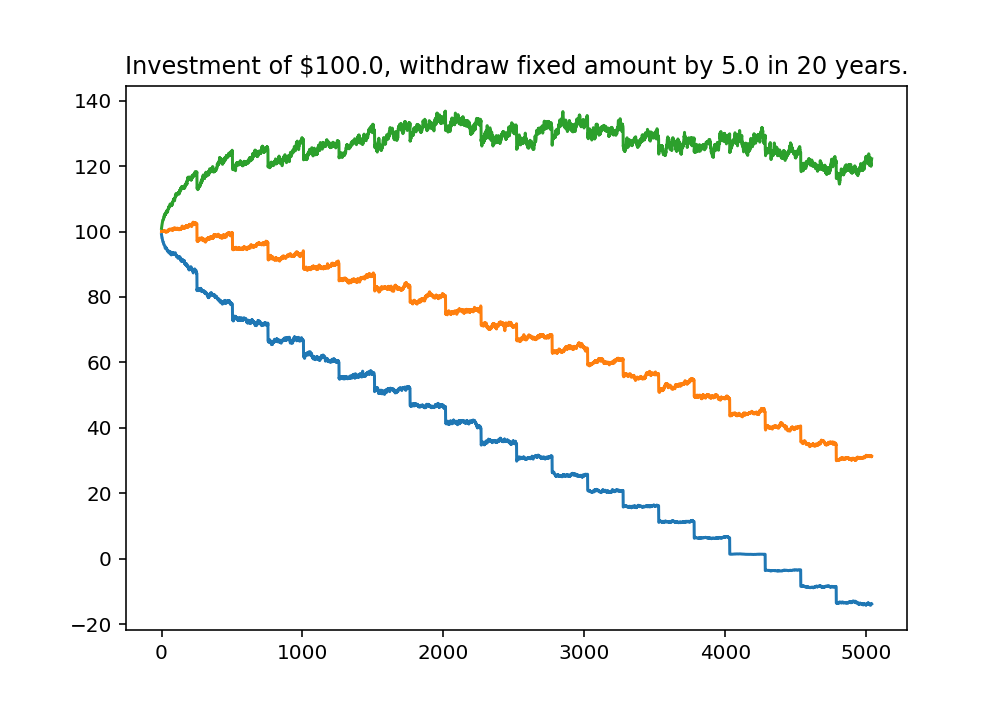
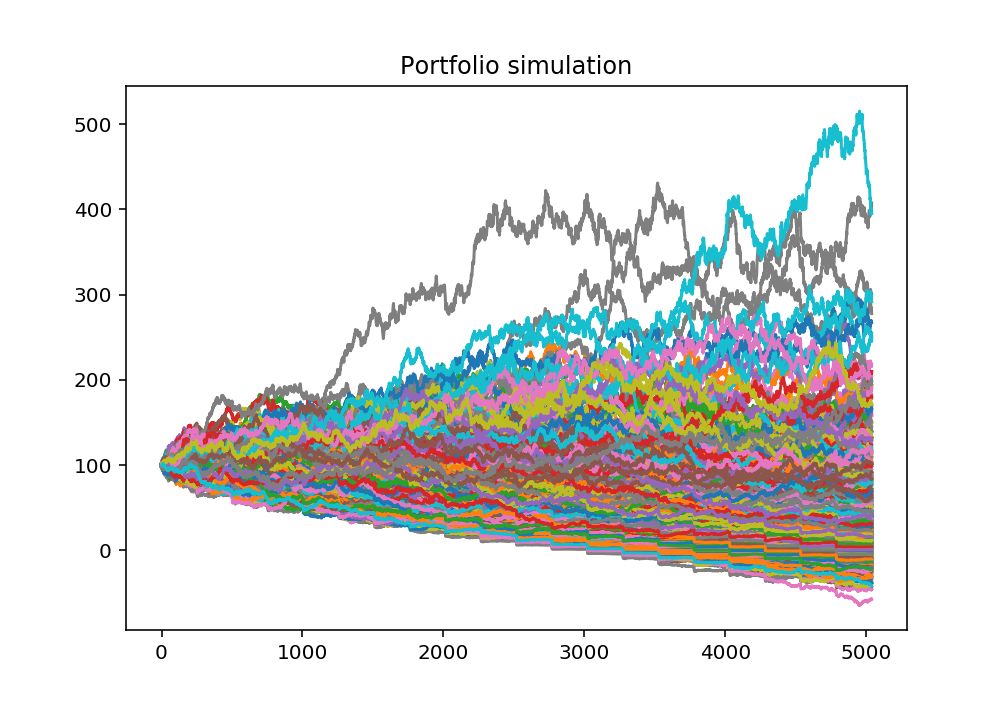
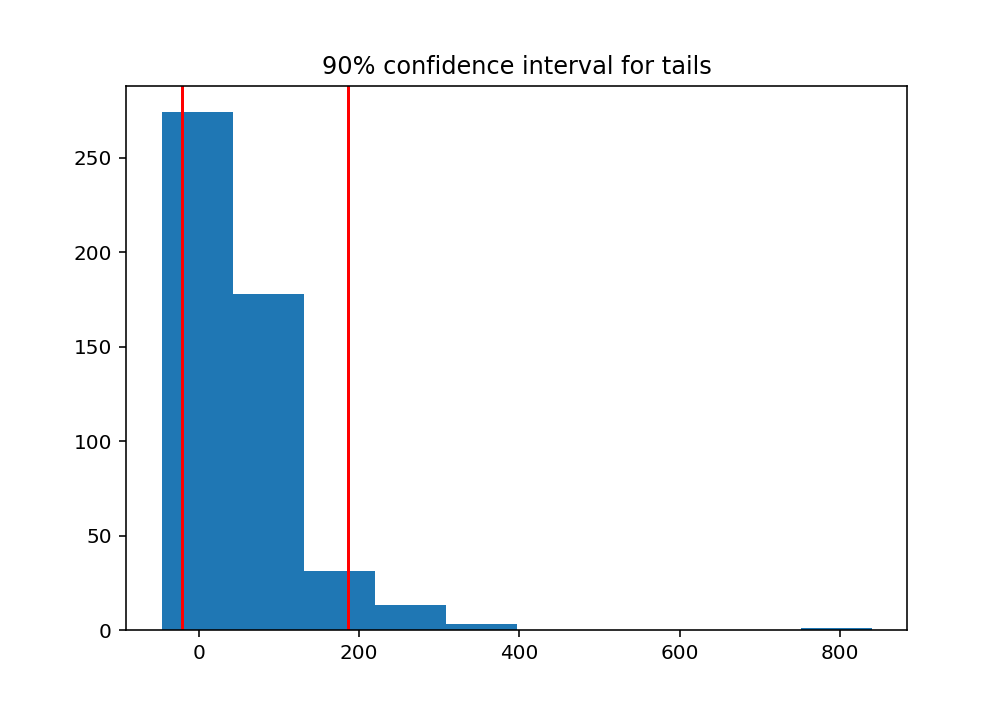

In [12]:

panel.servable()


<h2>Saving Planner</h2>


In [19]:
%%time
output1 = ys.search_withdraw_amount(portfolio, initial_investment, years_to_retirement, investment_goal) 
print(output1['a'])

Rather than withdrawing, you should deposit $16 annually, and ending 10% percentile balance after 20 years would be $350.
Wall time: 35.9 s


Wall time: 979 ms


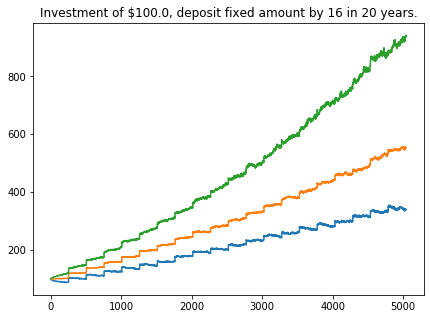

In [20]:
%%time
ys.quantile_chart(portfolio, initial_investment, 'fixed amount', output1['b'], years_to_retirement)


In [21]:
%%time
output2 = ys.search_withdraw_rate(portfolio, initial_investment, years_to_retirement, investment_goal)


print(output2['a'])

Rather than withdrawing, you should deposit 8.0% annually, and ending 10% percentile balance after 20 years would be $356.
Wall time: 1min 18s


Wall time: 1.01 s


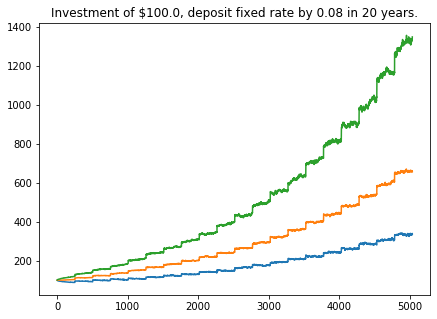

In [22]:
%%time
ys.quantile_chart(portfolio, initial_investment, 'fixed rate', output2['b'], years_to_retirement)